In [1]:
import pandas as pd
import glob
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow 
import autokeras as ak

In [2]:
import tensorflow

In [191]:
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "../raw_data/Test/*.txt"))))

In [192]:
pd.read_csv('../raw_data/Test/results1.txt')

,curr_dens,Volts_tot,Temp_tot,t_tot,SOC_tot
0,20.042216,3.985313,298.150000,0.0,75.000000
1,20.042216,3.985557,298.149698,0.5,75.009523
2,20.042216,3.985784,298.149335,1.0,75.019046
3,20.042216,3.986000,298.148992,1.5,75.028569
4,20.042216,3.986208,298.148668,2.0,75.038092
...,...,...,...,...,...
5600,-1.177744,3.816955,299.184734,2800.0,50.479229
5601,-1.177744,3.817003,299.182497,2800.5,50.478670
5602,-1.177744,3.817049,299.180265,2801.0,50.478110
5603,-1.177744,3.817094,299.178036,2801.5,50.477551


In [193]:
X=df.drop(columns=['SOC_tot'])
y = df.SOC_tot
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=False)

In [9]:
y_test

2635    66.499233
2636    66.482135
2637    66.465036
2638    66.447938
2639    66.430839
          ...    
5368    36.857142
5369    36.843749
5370    36.830355
5371    36.816961
5372    36.803568
Name: SOC_tot, Length: 163202, dtype: float64

Coefficients: 
 [-2.70505434e-01  1.57167742e+02  2.78735704e+00 -2.09336454e-04]
Mean squared error: 35.61
Coefficient of determination: 0.90


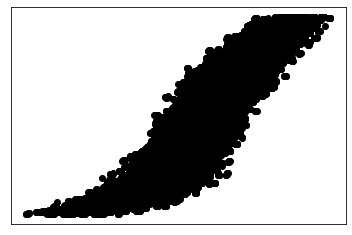

In [11]:
regr = LinearRegression()
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test['Volts_tot'], y_test,  color='black')
#plt.plot(X_test['voltage'], color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [6]:
X_test

,time,voltage,curr_density,temp
734,367.0,3.012058,-29.50,288.283766
335,167.5,3.709120,-14.75,311.891725
284,142.0,3.457124,-14.75,311.331105
140,70.0,3.701728,-14.75,265.802300
76,38.0,3.784274,-29.50,323.397874
...,...,...,...,...
48,24.0,3.635964,-29.50,278.390773
717,358.5,3.806399,-29.50,288.186784
68,34.0,3.871705,-29.50,308.301898
736,368.0,3.555800,-29.50,302.251302


In [7]:
y_test

734     2.234668
335    28.231656
284     7.589079
140    30.598304
76     51.934713
         ...    
48     21.327187
717    65.472967
68     70.046848
736    15.206656
800    26.309575
Name: SOC, Length: 29510, dtype: float64

In [12]:
import autokeras

In [13]:
# It tries 10 different models.
reg = ak.StructuredDataRegressor(max_trials=30, overwrite=True)
# Feed the structured data regressor with training data.
reg.fit(X_train, y_train, epochs=30)
# Predict with the best model.
predicted_y = reg.predict(X_test)
# Evaluate the best model with testing data.
print(reg.evaluate(X_test, y_test))

Trial 30 Complete [00h 04m 16s]
val_loss: 478.90435791015625

Best val_loss So Far: 0.438973993062973
Total elapsed time: 03h 20m 59s
INFO:tensorflow:Oracle triggered exit
Epoch 1/30
11901/11901 [==============================] - 12s 986us/step - loss: 1422.7758 - mean_squared_error: 1422.7758s - loss: 1668.2704 - ETA: 0s - loss: 1540.1647 - mean_squared_error: - ETA: 0s - loss: 1501.8062 - mean_sq
Epoch 2/30
11901/11901 [==============================] - 11s 961us/step - loss: 2.7639 - mean_squared_error: 2.7639s -
Epoch 3/30
11901/11901 [==============================] - 12s 1ms/step - loss: 1.5575 - mean_squared_error: 1.5575A: 12s - loss: 2.3789 - mean_squa - ETA: 10s - loss: 1. - ETA: 4s - loss: 1.3163 - mean_squared_error:  - ETA: 4s - loss: 1.5305 -  - ETA: 0s - loss: 1.6287 -  - ETA: 0s - loss: 1.5552 - mean_squared_error
Epoch 4/30
11901/11901 [==============================] - 12s 976us/step - loss: 1.5127 - mean_squared_error: 1.5127s - loss: 1.5156 - mean_squared_err
Epoch 

2021-09-28 16:06:01.916170: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets
5101/5101 [==============================] - 4s 794us/step - loss: 0.2140 - mean_squared_error: 0.2140
[0.21396014094352722, 0.21396014094352722]


In [14]:
model = reg.export_model()

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 4)                 0         
_________________________________________________________________
normalization (Normalization (None, 4)                 9         
_________________________________________________________________
dense (Dense)                (None, 64)                320       
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
regression_head_1 (Dense)    (None, 1)                 65        
Total params: 394
Trainable params: 385
Non-trainable params: 9
_______________________________________________________________

In [16]:
y_test[0:10]

2635    66.499233
2636    66.482135
2637    66.465036
2638    66.447938
2639    66.430839
2640    66.407558
2641    66.384277
2642    66.360997
2643    66.337716
2644    66.314435
Name: SOC_tot, dtype: float64

In [17]:
print(predicted_y[0:10])

[[66.15457 ]
 [66.108406]
 [66.064896]
 [66.02353 ]
 [65.984314]
 [65.987976]
 [65.93561 ]
 [65.886314]
 [65.83967 ]
 [65.79542 ]]


In [18]:
print(type(model))

<class 'tensorflow.python.keras.engine.functional.Functional'>


In [19]:
model.save("model_autokeras", save_format="tf")

INFO:tensorflow:Assets written to: model_autokeras/assets


In [20]:
from tensorflow.keras.models import load_model
loaded_model = load_model("model_autokeras", custom_objects=ak.CUSTOM_OBJECTS)

In [21]:
loaded_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 4)                 0         
_________________________________________________________________
normalization (Normalization (None, 4)                 9         
_________________________________________________________________
dense (Dense)                (None, 64)                320       
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
regression_head_1 (Dense)    (None, 1)                 65        
Total params: 394
Trainable params: 385
Non-trainable params: 9
_______________________________________________________________

In [22]:
predicted_y = loaded_model.predict(tf.expand_dims(X_test, -1))

<IPython.core.display.Javascript object>

In [43]:
predicted_y

array([[66.15457 ],
       [66.108406],
       [66.064896],
       ...,
       [36.33899 ],
       [36.296112],
       [36.25589 ]], dtype=float32)

In [46]:
y_test

2635    66.499233
2636    66.482135
2637    66.465036
2638    66.447938
2639    66.430839
          ...    
5368    36.857142
5369    36.843749
5370    36.830355
5371    36.816961
5372    36.803568
Name: SOC_tot, Length: 163202, dtype: float64

In [95]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

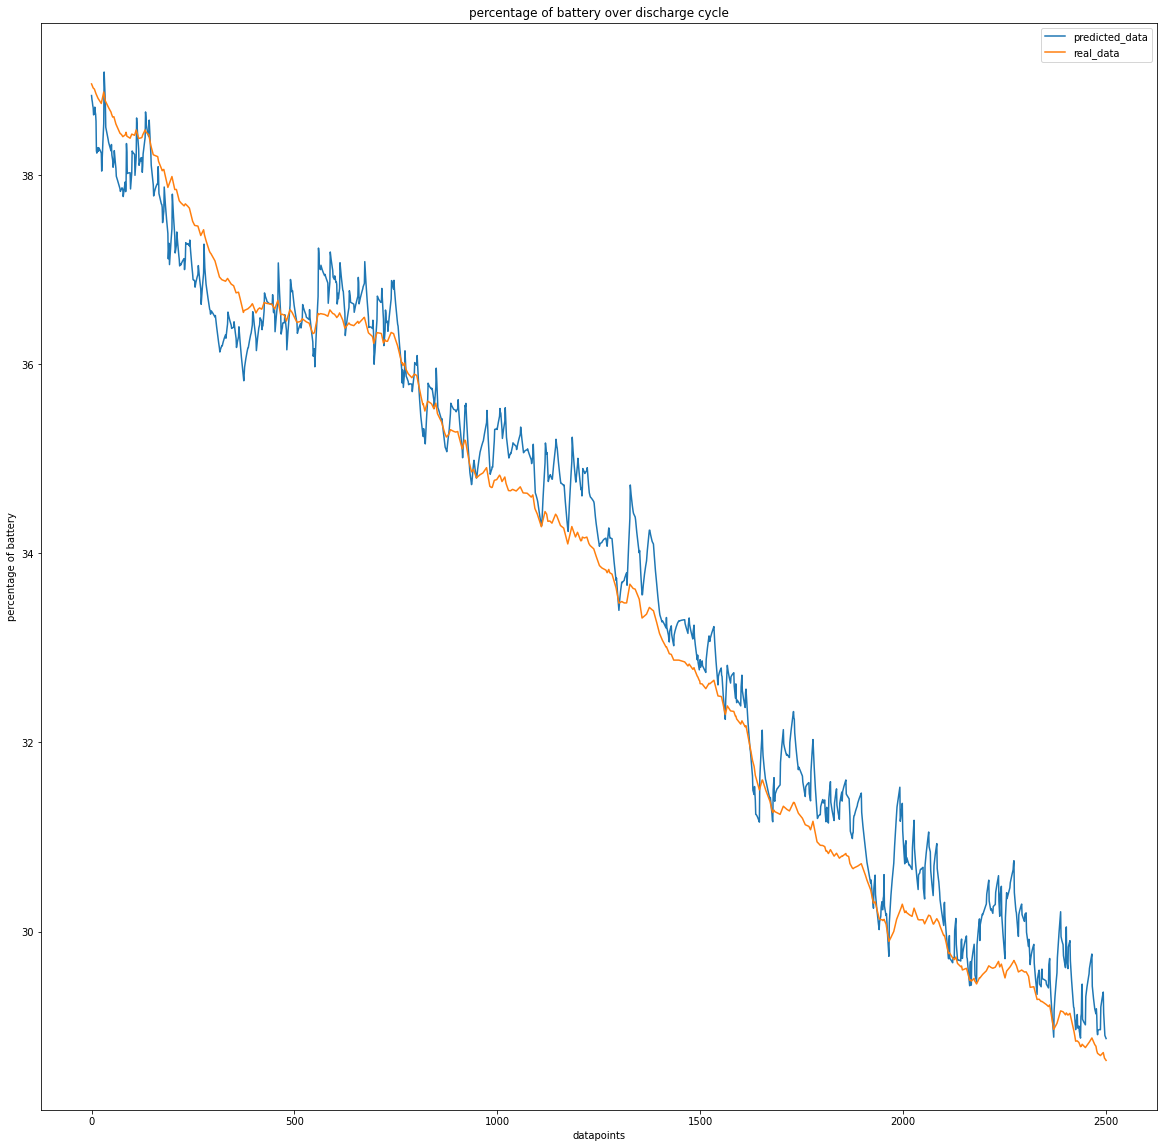

In [91]:
X = np.linspace(0,2500,2500)

plt.figure(figsize=(20,20))
plt.plot(X,predicted_y[3000:5500], label='predicted_data')
plt.plot(X,y_test[3000:5500], label='real_data')
plt.title('percentage of battery over discharge cycle')
plt.xlabel('datapoints')
plt.ylabel('percentage of battery')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

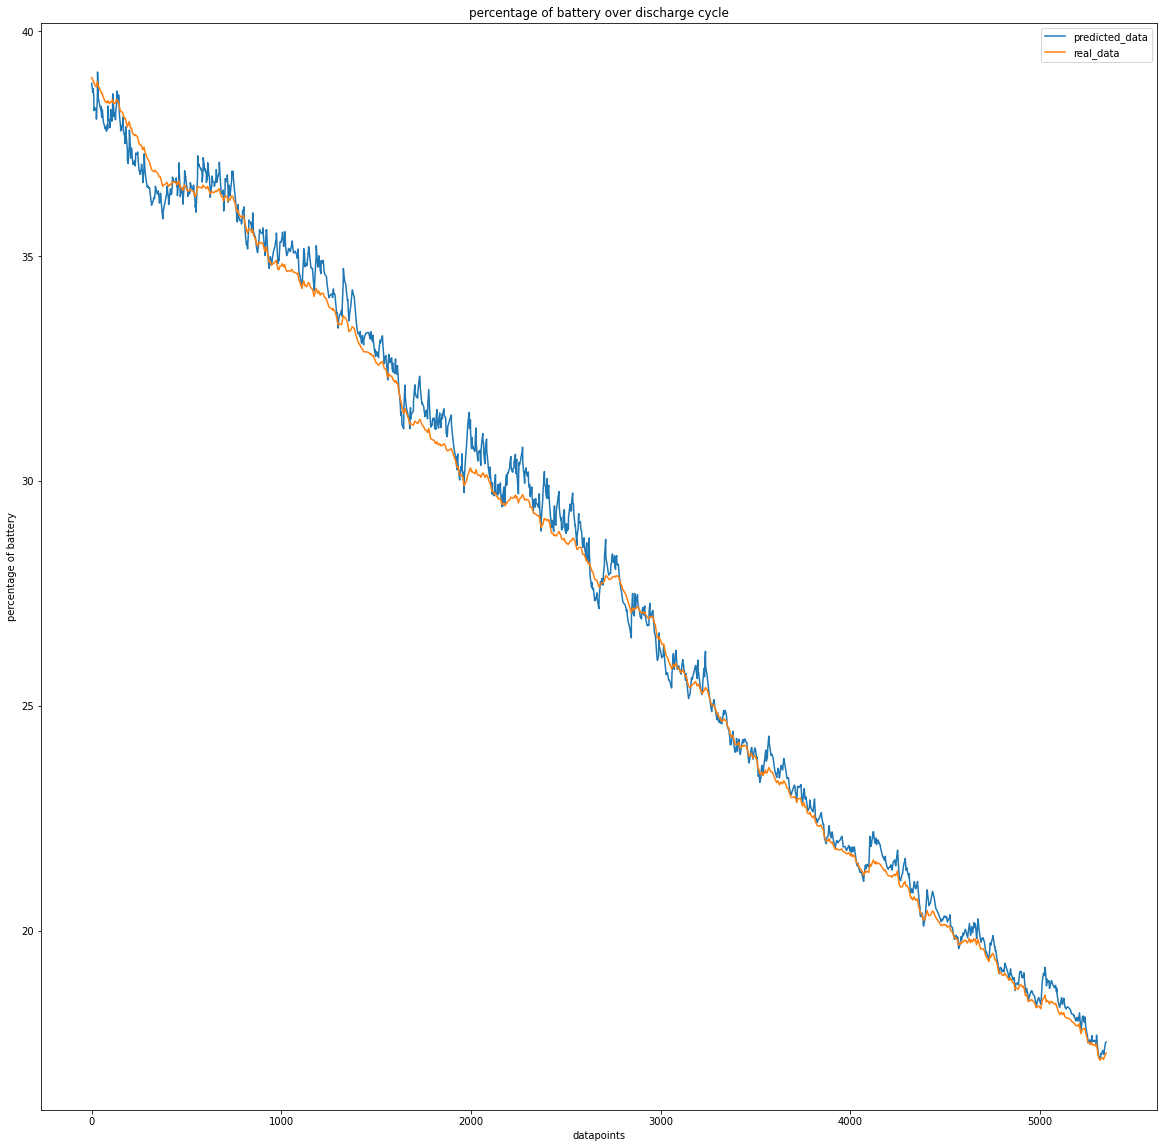

In [129]:
X = np.linspace(0,5350,5350)
plt.figure(figsize=(20,20))
plt.plot(X,predicted_y[3000:8350], label='predicted_data')
plt.plot(X,y_test[3000:8350], label='real_data')
plt.title('percentage of battery over discharge cycle')
plt.xlabel('datapoints')
plt.ylabel('percentage of battery')
plt.legend()
plt.show()

In [172]:
len(X_train)

380802

In [169]:
X_train = X_train.to_numpy()

In [173]:
X_train = X_train.reshape(1,380802,4)

In [179]:
y_train = y_train.to_numpy().reshape(1,380802,1)

In [186]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU

data_dim = 16
timesteps = 8
num_classes = 10

###  Simple RNN  ###
model2 = Sequential()
model2.add(SimpleRNN(units=10, activation='tanh'))  

###  LSTM   ###
#model3 = Sequential()
#model3.add(LSTM(units=10, activation='tanh',input_shape=(timesteps, data_dim)))

###  GRU ###
#model4 = Sequential()
#model4.add(GRU(units=10,input_shape=(1, 4), activation='tanh'))

# Compile with 'rmsprop' rather than 'adam' (recommended)
model2.compile(loss='mse',
              optimizer='rmsprop',
              metrics= ['accuracy']) 

#model3.compile(loss='mse',
             # optimizer='rmsprop',
             # metrics= ['accuracy'])  

#model4.compile(loss='mse',
              #optimizer='rmsprop',
              #metrics= ['accuracy'])  

In [196]:
X_train.shape

(380802, 4)

In [328]:
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "../raw_data/Test/*.txt"))))

In [329]:
df

,curr_dens,Volts_tot,Temp_tot,t_tot,SOC_tot
0,-23.538367,3.963454,298.150000,0.0,82.000000
1,-23.538367,3.963147,298.151811,0.5,81.988816
2,-23.538367,3.962862,298.153755,1.0,81.977631
3,-23.538367,3.962591,298.155722,1.5,81.966447
4,-23.538367,3.962331,298.157708,2.0,81.955263
...,...,...,...,...,...
5368,-1.243947,3.759022,299.532912,2684.0,36.857142
5369,-28.188080,3.715951,299.536224,2684.5,36.843749
5370,-28.188080,3.715737,299.539873,2685.0,36.830355
5371,-28.188080,3.715534,299.543545,2685.5,36.816961


In [333]:
X=df.drop(columns=['SOC_tot'])
y = df.SOC_tot
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=False)

In [308]:
from numpy import genfromtxt
X = []
y = []
for i in range(1,101):
    my_data = genfromtxt(f'../raw_data/Test/results{i}.txt', delimiter=',')[1:]
    temp_x = []
    temp_y = []
    for i in range(len(my_data)):
        temp_x.append(my_data[i][:4])
        temp_y.append(my_data[i][4])
    X.append(temp_x)
    y.append(temp_y)
y=np.array([np.array(xi) for xi in y])
X=np.array([np.array(xi) for xi in X])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=False)

In [331]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU

model2 = Sequential()
model2.add(SimpleRNN(units=10, activation='tanh'))  

model2.compile(loss='mse',
              optimizer='rmsprop',
              metrics= ['accuracy']) 
model2.fit(X_train, y_train,validation_data=(X_test,y_test))

In [332]:
model2.fit(X_train, y_train,validation_data=(X_test,y_test))
#model3.fit(X_train, y_train,validation_data=(X_test,y_test))
#model4.fit(X_train, y_train,validation_data=(X_test,y_test))

ValueError: in user code:

    /Users/monmac/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /Users/monmac/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/monmac/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/monmac/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/monmac/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/monmac/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /Users/monmac/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 train_step
        y_pred = self(x, training=True)
    /Users/monmac/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/monmac/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:215 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_18 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 2)


In [324]:
X_train

array([array([[ 2.00422164e+01,  3.98531329e+00,  2.98150000e+02,
         0.00000000e+00],
       [ 2.00422164e+01,  3.98555732e+00,  2.98149698e+02,
         5.00000000e-01],
       [ 2.00422164e+01,  3.98578379e+00,  2.98149335e+02,
         1.00000000e+00],
       ...,
       [-1.17774394e+00,  3.81704902e+00,  2.99180265e+02,
         2.80100000e+03],
       [-1.17774394e+00,  3.81709368e+00,  2.99178036e+02,
         2.80150000e+03],
       [-1.17774394e+00,  3.81713691e+00,  2.99175812e+02,
         2.80200000e+03]]),
       array([[-2.35383670e+01,  3.96345359e+00,  2.98150000e+02,
         0.00000000e+00],
       [-2.35383670e+01,  3.96314670e+00,  2.98151811e+02,
         5.00000000e-01],
       [-2.35383670e+01,  3.96286239e+00,  2.98153755e+02,
         1.00000000e+00],
       ...,
       [-1.86104653e+01,  3.84839764e+00,  2.98920350e+02,
         2.81050000e+03],
       [-1.86104653e+01,  3.84826035e+00,  2.98921477e+02,
         2.81100000e+03],
       [-1.86104653e+01, 

In [312]:
model3 = Sequential()
model3.add(LSTM(units=10, activation='tanh'))

model3.compile(loss='mse',
               optimizer='rmsprop',
               metrics= ['accuracy']) 

In [313]:
model3.fit(X_train, y_train,validation_data=(X_test,y_test))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [306]:
model4 = Sequential()
model4.add(GRU(units=10,input_shape=(1, 4), activation='tanh'))
model4.compile(loss='mse',
               optimizer='rmsprop',
               metrics= ['accuracy'])  

In [307]:
model4.fit(X_train, y_train,validation_data=(X_test,y_test))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).